## Assignment 6
Zuzanna Liberto <br>
10.24.2020 <br>

In [1]:
import numpy as np
from scipy.optimize import *
from scipy.cluster.vq import *
from pylab import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Q1

In [2]:
# x - mutual fund 1
# y - mutual fund 2
# x + y = 10,000
# 1.02x + 1.04y = 10,250

a = np.array([[1,1], [1.02, 1.04]])
b = np.array([10000, 10250])
sol = np.linalg.solve(a,b)

print(sol)
print("\nInitially he put $", round(sol[0]), "into the first mutual fund and $", round(sol[1]), "into the second mutual fund")



[7500. 2500.]

Initially he put $ 7500.0 into the first mutual fund and $ 2500.0 into the second mutual fund


### Q2

In [3]:
# intialize the arrays
x = np.array([3420, 3400, 3250, 3410, 3190, 3250, 2860, 2830, 3160, 2820, 2780, 2900, 2810, 2580, 2520, 2430])
y = np.array([127, 134, 136, 139, 140, 141, 148, 149, 151, 154, 155, 157, 159, 167, 168, 171])

#this function returns y values for the linear curve
def lin(x, a, b):
    return a*x+b

#this function returns y values for the exponential curve
def exp(x, a, b):
    return a*(b**x)

#this function returns y values for the logarithmic curve
def log(x, a, b):
    return a+b*np.log(x)

#this function returns y values for the power curve
def powr(x, a, b):
    return a*(x**b)


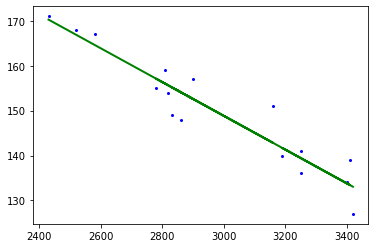

In [4]:
# Linear fit

#fit the curve
attributes,variances = curve_fit(lin,x,y)

#plot results
plt.plot(x,y,'ob',markersize=2)
plt.plot(x,lin(x, *attributes),'-g',linewidth=2)
show()


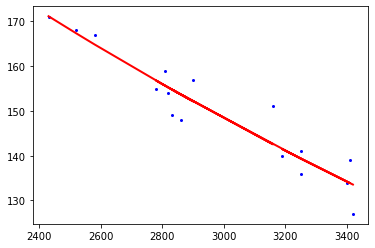

In [5]:
# Exponential fit

#fit the curve
attributes,variances = curve_fit(exp,x,y)

#plot results
plt.plot(x,y,'ob',markersize=2)
plt.plot(x,exp(x, *attributes),'-r',linewidth=2)
show()


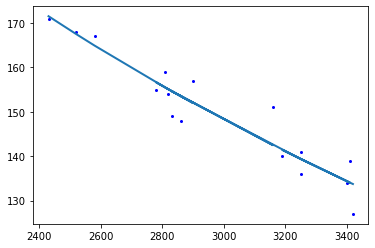

In [6]:
# Logarithmic fit

attributes,variances = curve_fit(log,x,y)

plt.plot(x,y,'ob',markersize=2)
plt.plot(x,log(x, *attributes),'-',linewidth=2)
show()

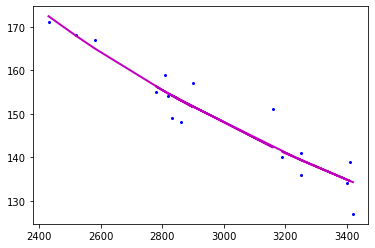

In [7]:
# Power-Law fit

attributes,variances = curve_fit(powr,x,y)

plt.plot(x,y,'ob',markersize=2)
plt.plot(x,powr(x, *attributes),'-m',linewidth=2)
show()

### Q3

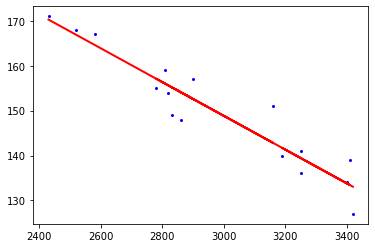

In [8]:
# initialize the arrays
x = np.array([3420, 3400, 3250, 3410, 3190, 3250, 2860, 2830, 3160, 2820, 2780, 2900, 2810, 2580, 2520, 2430])
y = np.array([127, 134, 136, 139, 140, 141, 148, 149, 151, 154, 155, 157, 159, 167, 168, 171])

#this function returns y values
def linreg(x,a,b):
    return a*x+b

#fit the curve
attributes,variances = curve_fit(linreg,x,y)

#find predicted y values
y_modeled = x*attributes[0]+attributes[1]

#plot results
plot(x,y,'ob',markersize=2)
plot(x,y_modeled,'-r',linewidth=2)
show()


### Q4

In [9]:
# read the file
df = np.genfromtxt('AssignmentNumpyData.csv', delimiter = ",")


#### k = 3

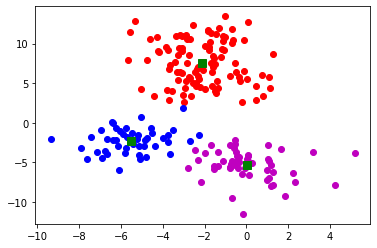

In [10]:
#initialize centroids
centroids,_ = kmeans(df,3)
index,_ = vq(df,centroids)

#plot points and centroids
plot(df[index==0,0],df[index==0,1],'or', 
     df[index==1,0],df[index==1,1],'ob',
     df[index==2,0],df[index==2,1],'om')

plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

show()

#### k = 4

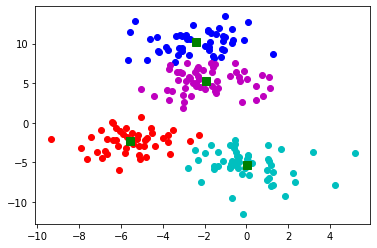

In [11]:
#initialize centroids
centroids,_ = kmeans(df, 4)
index,_ = vq(df,centroids)

#plot points and centroids
plot(df[index==0,0],df[index==0,1],'or', 
     df[index==1,0],df[index==1,1],'ob',
     df[index==2,0],df[index==2,1],'om',
     df[index==3,0],df[index==3,1],'oc')

plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

show()

#### k = 5

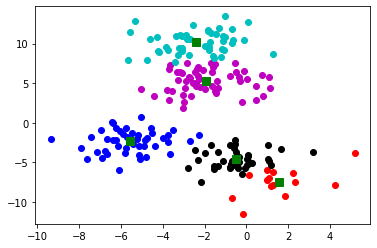

In [12]:
#initialize centroids
centroids,_ = kmeans(df, 5)
index,_ = vq(df,centroids)

#plot points and centroids
plot(df[index==0,0],df[index==0,1],'or', 
     df[index==1,0],df[index==1,1],'ob',
     df[index==2,0],df[index==2,1],'om',
     df[index==3,0],df[index==3,1],'oc',
     df[index==4,0],df[index==4,1],'ok')

plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

show()

### **Answer: The optimal number of clusters is 4.**


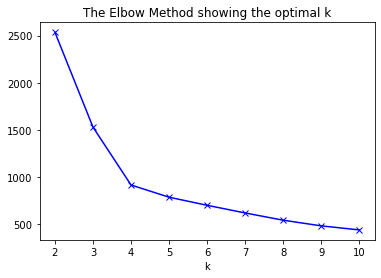

In [13]:
#I used the Elbow method to determine the optimal number of clusters:

sil = []
ran = range(2, 11)

for k in ran:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X = df)
  sil.append(kmeans.inertia_)
    

plt.plot(ran, sil, 'bx-')
plt.xlabel('k')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#the x value of the point that is the closest to (0,0) is the optimal k